# geolocalisation: formulation

We want to find the float horizontal position $\underline{x}=(x,y)$ of the float a given a number of knowns:
- $\underline{x}_s^i$ : source buoy horizontal position (perfect knowledge)
- $t_e^i$ : time of emission (perfect knowledge)
- $\tilde{t}_r^i$ : time of reception of the signal emitted by source $i$ by the underwater float (perfect knowledge)
- $\epsilon_i$ : signal detection, $\epsilon_i=1$ (detection) or $1$ (no detection)
- $z$ : underwater float depth(perfect knowledge), not used for now

'Perfect' knowledge is assumed for some variables wich amounts to say errors may be neglected.

Unknown are:
- $\underline{x}$ : underwater float position
- $\underline{x}_t^i$ : transducteur horizontal positions, $\underline{x}_t^i = \underline{x}_s^i + \delta \underline{x}^i$
- $t_r^i$ : true time of reception $t_r^i = \tilde{t}_r^i + \delta t$, where $\delta t$ is the underwater float clock offset. The rms amplitude of the clock offset $e_{\delta t}$ is assumed to be known.
- $c(\underline{x},\underline{x}_t^i)$ : true 'celerity' which we define as $c(\underline{x},\underline{x}_t^i) = ||\underline{x} - \underline{x}_t^i ||/(t_r^i - t_e^i) $. This celerity is assumed ot be equal to the sum of a background estimate (known from climatology, or in situ measurement) and a departure from it: $c(\underline{x},\underline{x}_t^i) = c_b + \delta c (\underline{x},\underline{x}_t^i)$. The rms of $\delta c$ is assumed to be known ($e_c$).


Equations satisfied (hard constraints):
$$
||\underline{x} - \underline{x}_t^i || = c(\underline{x},\underline{x}_s^i) \times (t_r^i - t_e^i), \\
\underline{x}_t^i = \underline{x}_s^i + \delta \underline{x}^i, \\
t_r^i = \tilde{t}_r^i + \delta t, \\
c(\underline{x},\underline{x}_t^i) = c_b + \delta c (\underline{x},\underline{x}_t^i).
$$

Approximate unknows ($\delta t$, $\delta \underline{x}_i$, $\delta c(\underline{x},\underline{x}_t^i)$) are assumed to have zero mean but known rms.

We thus want to minimize:
$$
J(\mathbf{x}, \delta t, \delta \underline{x}_i, \delta c (\underline{x},\underline{x}_t^i)) = 
\delta t^2 / e_{\delta t}^2 
+ \sum_i \epsilon_i \times ( ||\delta \underline{x}_i||^2 / e_{\delta x}^2
+ \delta c (\underline{x},\underline{x}_t^i)^2 / e_c^2 )
$$
subject to the hard constraints listed above


We have assumed simultaneous emission of sources.
The underwater float velocity may be considered as well.




In [9]:

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings
warnings.filterwarnings(action='ignore')


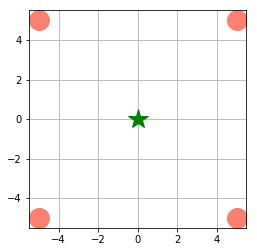

In [17]:

# background sound speed
c_b = 1500. # m/s

# class for sources
class source(object):
    ''' A source object '''
    def __init__(self, x, y, e_dx=2., e_c=10., label=''):
        '''
        Parameters
        ----------
        x,y  - horizontal position in meters
        e_i - rms between transductor position uncertainty on the distance estimation
        label - a label for the source
        '''
        self.x=x
        self.y=y
        #
        self.e_dx = e_dx
        self.draw_transductor()
        #
        self.draw_celerity(e_c)
        #
        #self.tau_i=None
        self.label = ('source ' + label).strip()
        
    def plot(self):
        plt.plot(self.x/1.e3,self.y/1.e3, color='salmon', marker='o', markersize=20, label=self.label)
    
    #def set_tau_i(self,obj):
    #    self.tau_i = np.sqrt((self.x-obj.x)**2+(self.y-obj.y)**2)/c
    
    def draw_transductor(self, Np=1):
        ''' compute Np realizations of transductor position
        '''
        self.dx = np.random.randn(Np)*self.e_dx
        self.dy = np.random.randn(Np)*self.e_dx
        self.xt = self.x + self.dx
        self.yt = self.y + self.dy

    def draw_celerity(self, e_c, Np=1, c_b=1500.):
        ''' compute Np celerities with rms celerities e_c
        '''
        self.e_c = e_c
        self.c = c_b + np.random.randn(Np)*e_c
        
        
# class for receivers:
class receiver(object):
    ''' A receiver object '''
    def __init__(self, x, y, e_dt=1., label='receiver'):
        '''
        Parameters
        ----------
        x,y  - horizontal position in meters
        e_dt - uncertainty on the clock drift in seconds
        label - a label for the receiver
        '''
        self.x = x
        self.y = y
        self.e_dt = e_dt
        self.draw_clock_drift()
        self.label = ('receiver ' + label).strip()

    def plot(self):
        plt.plot(self.x/1.e3,self.y/1.e3, color='green', marker='*', markersize=20, label=self.label)
        
    def draw_clock_drift(self, e_dt, Np=1):
        self.e_dt = 
        self.dt = np.random.randn(Np)*self.e_dt


        
### create an ensemble of sources

# square formation:
dx=10. *1.e3 # in meters
sources=[]
sources.append(source(-dx*.5,-dx*.5))
sources.append(source(dx*.5,-dx*.5))
sources.append(source(dx*.5,dx*.5))
sources.append(source(-dx*.5,dx*.5))
#sources.append(source(0.,dx*.25))
Ns = len(sources)

# triangle formation:
#dx=10. *1.e4 # in meters
#sources=[]
#sources.append(source(-dx*.5,-dx.*5))
#sources.append(source(dx,-dx*.5))
#sources.append(source(0.,dx*.5))


### init a receiver
r=receiver(0. *1.e3,0. *1.e3)



### plot
plt.figure()
ax=plt.subplot(111)
[s.plot() for s in sources]
r.plot()
ax.grid()
#ax.set_xlim([-1.,21.])
#ax.set_ylim([-1.,11.])
ax.set_aspect('equal')
plt.show()




In [18]:
# x = [x, y, dt, dx0, dy0, dx1, dy1, ...,  dc0, dc1, ...]

# source float position (known)
x_s = np.array([s.x for s in sources])
y_s = np.array([s.y for s in sources])
# transductor positions (unknown)
x_t = np.array([s.xt[0] for s in sources])
y_t = np.array([s.yt[0] for s in sources])
# emission time
t_e = np.zeros_like(x_s)
# measured arrival times
t_r_tilda = t_e + np.sqrt((r.x-x_t)**2+(r.y-y_t)**2)/np.array([s.c[0] for s in sources]) \
            - r.dt

Ns = len(sources)
idx = slice(3, 3+2*Ns, 2)
idy = slice(3, 3+2*Ns, 2)
idc = slice(3+2*Ns,3+3*Ns)

def func(x, W):
    dt = x[2]
    dx = x[idx]
    dy = x[idy]
    dc = x[idc]
    return dt**2*W[0] + np.mean((dx**2+dy**2)*W[1]) + np.mean(dc**2*W[2])

def jac(x, W):
    dt = x[2]
    dx = x[idx]
    dy = x[idy]
    dc = x[idc]
    #
    jac = np.zeros_like(x)
    jac[2] = 2.*dt*W[0]
    jac[idx] = 2.*dx*W[1]
    jac[idy] = 2.*dy*W[1]
    jac[idc] = 2.*dc*W[2]
    return jac

W = [1./np.array(r.e_dt**2),
     1./np.array([s.e_dx**2 for s in sources]), 
     1./np.array([s.e_c**2 for s in sources])]

x0 = np.zeros((3+3*Ns))
x0[0] = 1000.

print(W)

[1.0, array([0.25, 0.25, 0.25, 0.25]), array([0.01, 0.01, 0.01, 0.01])]


In [19]:
cons = []

for i, s in enumerate(sources):
    # ! late binding gotcha !
    def cfun(x, i=i, s=s):
        dt = x[2]
        dx = x[idx]
        dy = x[idy]
        dc = x[idc]
        return np.array([(x[0] - s.x - dx[i])**2 + (x[1] - s.y - dy[i])**2 
                          - (c_b + dc[i])**2 *(t_r_tilda[i] + dt - t_e[i])**2])
    # ! late binding gotcha !
    def cjac(x, i=i, s=s):
        dt = x[2]
        dx = x[idx]
        dy = x[idy]
        dc = x[idc]
        #
        jac = np.zeros_like(x)
        jac[0] = 2.*(x[0] - s.x - dx[i])
        jac[1] = 2.*(x[1] - s.y - dy[i])
        jac[2] = -2.*(c_b + dc[i])**2 * (t_r_tilda[i] + dt - t_e[i])
        jac[idx][i] = -2.*(x[0] - s.x - dx[i])
        jac[idy][i] = -2.*(x[1] - s.y - dy[i])
        jac[idc][i] = - 2.*(c_b + dc[i]) * (t_r_tilda[i] + dt - t_e[i])**2
        return jac
    #
    cons.append({'type': 'eq', 'fun' : cfun, 'jac' : cjac})

res = minimize(func, x0, args=(W,), jac=jac, constraints=cons, method='SLSQP', 
               options={'maxiter': 1000, 'disp': True})

Iteration limit exceeded    (Exit mode 9)
            Current function value: 1.5342600291696336
            Iterations: 1001
            Function evaluations: 10625
            Gradient evaluations: 1001


In [20]:
print(x0)
print(t_r_tilda)
print(cons[0]['fun'](x0))
print(cons[1]['fun'](x0))
print(cons[2]['fun'](x0))
print(cons[3]['fun'](x0))

[1000.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.]
[5.53896985 5.48874101 5.50555423 5.43439931]
[-8030420.82287966]
[-26784125.28837454]
[-27200036.6783423]
[-5448565.76121606]


In [21]:
# extract the solution
x = res.x[0]
y = res.x[1]
dt = res.x[2]
dx = res.x[idx]
dy = res.x[idy]
dc = res.x[idc]
print('estimated/truth')
print('x=%.1fm / %.1fm, y=%.1fm %.1fm' %(x,r.x,y,r.y))
print('dt=%.2fs / %.2fs'%(dt,r.dt))
print('dx=')
print(dx)
print('truth = ')
print(x_t-x_s)
print('dy=')
print(dy)
print('truth = ')
print(y_t-y_s)
print('dc=')
print(dc)
print('truth = ')
print(np.array([s.c[0]-c_b for s in sources]))

estimated/truth
x=-12.0m / 0.0m, y=46.7m 0.0m
dt=-0.78s / -0.76s
dx=
[-0.05912926  0.0574844   0.05783486 -0.05645972]
truth = 
[-2.3167646   0.97104533  1.07495457  2.89298133]
dy=
[-0.05912926  0.0574844   0.05783486 -0.05645972]
truth = 
[-1.63602679 -0.04471515  2.07172073 -1.95329412]
dc=
[-9.8887845   9.56157475 -9.7530893   9.33832671]
truth = 
[-20.19983771  -4.92477533  -9.90284617  11.56465871]


In [152]:
print(res.x)
print(cons[0]['fun'](res.x))
print(cons[1]['fun'](res.x))
print(cons[2]['fun'](res.x))
print(cons[3]['fun'](res.x))

[-1.86890267e+00  9.30026606e-03 -4.03627516e+00  1.91481207e-02
 -8.53472179e-14  2.93835514e-02  2.33946100e-14 -1.82321378e-02
 -6.38159010e-16 -2.92754705e-02  0.00000000e+00  2.42869933e-01
  3.91122856e-01  2.42782606e-01  3.91070046e-01]
[0.29835741]
[1.08223116]
[6.07774795]
[0.18788994]


In [11]:
from sympy import symbols
from sympy.utilities.lambdify import lambdify

a,b,G = symbols('a b G')
func = -1*((G - a)**2 + b)
my_func = lambdify((G,a,b), func)

def my_func_v(x):
    return my_func(*tuple(x))

results = minimize(my_func_v,[0.1,0.1,0.1])

In [12]:
print(results)

      fun: -357913941.1
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 80
      nit: 1
     njev: 16
   status: 0
  success: True
        x: array([5.43333333e+00, 5.43333333e+00, 3.57913941e+08])
